### Onde encontrar dados de series temporias


* [kaggle](https://www.kaggle.com)
* [UCI-ML Repository](https://archive.ics.uci.edu/)


##### Estados Unidos
* [Series temporais relacionadas as temperaturas e precipitação oriundas de todas as estações meterologicas do pais](https://perma.cc/EA5R-TP5L)
* [Series temporais voltadas indice mensal da taxa de desemprego norte-americana](https://www.bls.gov/)
* [Series temporais saúde](https:perma.cc/Y6KG-T948)
* [Series temporais economicas](https://fred.stlouisfed.org/) 

##### outros repositorios que deve explorar

*[compengine](https://comp-engine.org)
*[mcomp](https://cran.r-project.org/package=Mcomp)
*[m4comp2018](https://github.com/carlnetto/M4comp2018/)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

**timestamp** é um ponto especifico em determinada linha do tempo que considera determinado fuso horario

In [36]:
emails_abertos = pd.read_csv('dataset/email/emails.csv')

In [37]:
emails_abertos.head(3)

,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00


> `emailsOpened`: emails abertos
>
> `user`: usuario
>
> `week`: Dia que os emais foram abertos

In [38]:
doacao = pd.read_csv('dataset/email/donations.csv')

In [39]:
doacao.head(3)

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0


> `timestamp`: dia e horario da doação
>
> `amount`: valor da doação
>
> `user`: usuario

In [40]:
ano_entrada = pd.read_csv('dataset/email/year_joined.csv')

In [41]:
ano_entrada.head(3)

,user,userStats,yearJoined
0,0,silver,2014
1,1,silver,2015
2,2,silver,2016


o numero total de emais abertos se correlaciona com o total de doações

In [42]:
# total de emais abertos por usuario
total_emails = emails_abertos.groupby(
    by='user'
)[['emailsOpened']].sum().reset_index()

# imprimindo valor
total_emails.head(3)

,user,emailsOpened
0,1.0,406.0
1,3.0,17.0
2,5.0,63.0


In [43]:
# total de doação por usuario
total_doacao = doacao.groupby(
    by='user'
)[['amount']].sum().reset_index()

#imprimindo valor
total_doacao.head(2)

,user,amount
0,0.0,150.0
1,1.0,175.0


In [44]:
pd.merge(
    left=total_emails, right=total_doacao,
    how='inner', on='user'
)[['emailsOpened','amount']].corr()

,emailsOpened,amount
emailsOpened,1.000000,0.428141
amount,0.428141,1.000000


<Axes: xlabel='emailsOpened', ylabel='amount'>

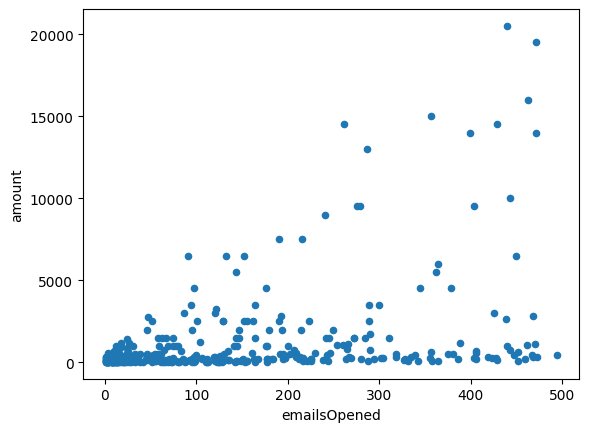

In [45]:
pd.merge(
    left=total_emails, right=total_doacao,
    how='inner', on='user'
)[['emailsOpened','amount']].plot.scatter(x='emailsOpened', y='amount')

In [46]:
# verificando se status do membro é anual ou apenas o mais recente
ano_entrada.groupby(by='user')[['userStats']].count()

,userStats
user,
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1


In [47]:
emails_abertos[
    emails_abertos['emailsOpened'] < 1
]

,emailsOpened,user,week


In [48]:
emails_abertos[
    emails_abertos['user'] == 998
]

,emailsOpened,user,week
25464,1.0,998.0,2017-12-04 00:00:00
25465,3.0,998.0,2017-12-11 00:00:00
25466,3.0,998.0,2017-12-18 00:00:00
25467,3.0,998.0,2018-01-01 00:00:00
25468,3.0,998.0,2018-01-08 00:00:00
25469,2.0,998.0,2018-01-15 00:00:00
25470,3.0,998.0,2018-01-22 00:00:00
25471,2.0,998.0,2018-01-29 00:00:00
25472,3.0,998.0,2018-02-05 00:00:00
25473,3.0,998.0,2018-02-12 00:00:00


In [49]:
emails_abertos['week'] = pd.to_datetime(emails_abertos['week'])

In [50]:
# Calculando o número de semanas 
# devem ter calulando o ultimo e primerio de dias de semana

semanas_obg = emails_abertos[emails_abertos['user']==998].week.max() - emails_abertos[emails_abertos['user']==998].week.min()
semanas_obg = semanas_obg/7

In [51]:
semanas_obg.days

25

> É necessario ter 25 observações

In [52]:
emails_abertos[emails_abertos['user']==998].shape

(24, 3)

In [53]:
semana_completa = pd.MultiIndex.from_product(
    (set(emails_abertos['week']), set(emails_abertos['user']))
)

In [54]:
semana_completa

MultiIndex([('2017-01-16',   1.0),
            ('2017-01-16',   3.0),
            ('2017-01-16',   5.0),
            ('2017-01-16',   6.0),
            ('2017-01-16',   9.0),
            ('2017-01-16',  10.0),
            ('2017-01-16',  14.0),
            ('2017-01-16',  16.0),
            ('2017-01-16',  20.0),
            ('2017-01-16',  21.0),
            ...
            ('2015-03-23', 973.0),
            ('2015-03-23', 977.0),
            ('2015-03-23', 982.0),
            ('2015-03-23', 984.0),
            ('2015-03-23', 987.0),
            ('2015-03-23', 991.0),
            ('2015-03-23', 992.0),
            ('2015-03-23', 993.0),
            ('2015-03-23', 995.0),
            ('2015-03-23', 998.0)],
           length=93247)

In [55]:
todos_emails = emails_abertos.set_index(
    ['week', 'user']
).reindex(semana_completa, fill_value=0).reset_index()

In [56]:
todos_emails.columns=['week', 'user', 'emailsOpened'] 

In [57]:
todos_emails[todos_emails['user']==998].sort_values(by=['week'])

,week,user,emailsOpened
3772,2015-02-09,998.0,0.0
10779,2015-02-16,998.0,0.0
61984,2015-02-23,998.0,0.0
36112,2015-03-02,998.0,0.0
41502,2015-03-09,998.0,0.0
...,...,...,...
25871,2018-04-30,998.0,3.0
73842,2018-05-07,998.0,3.0
35573,2018-05-14,998.0,3.0
76537,2018-05-21,998.0,3.0


In [58]:
ponto_de_corte = emails_abertos\
    .groupby(by=['user'])[['week']]\
    .agg({'min','max'})\
    .reset_index()

ponto_de_corte.head(2)


user       week           
              max        min
0  1.0 2018-05-28 2015-06-29
1  3.0 2018-04-23 2018-03-05

In [59]:
todos_emails['week']

0       2017-01-16
1       2017-01-16
2       2017-01-16
3       2017-01-16
4       2017-01-16
           ...    
93242   2015-03-23
93243   2015-03-23
93244   2015-03-23
93245   2015-03-23
93246   2015-03-23
Name: week, Length: 93247, dtype: datetime64[ns]

In [60]:
for _, linhas in ponto_de_corte.iterrows():
    user_ = linhas['user'].values
    min_  = linhas['week']['min']
    max_  = linhas['week']['max']
   
    todos_emails.drop(
        index = (
            todos_emails.loc[
                (todos_emails['user'] == user_[0]) &
                (todos_emails['week'] < min_)
            ]
        ).index, inplace=True
    )
    todos_emails.drop(
        index = (
            todos_emails.loc[
                (todos_emails['user'] == user_[0]) &
                (todos_emails['week'] > max_)
            ]
        ).index, inplace=True
    )

In [61]:
todos_emails[todos_emails['user']==998].shape

(26, 3)

#### encontrando uma serie temporal encontrada

In [62]:
doacao['timestamp'] = pd.to_datetime(doacao['timestamp'])

In [63]:
doacao.set_index(keys=['timestamp'], inplace=True)

In [64]:
agg_don = doacao\
            .groupby(by=['user'])\
            .apply(
                lambda df: df['amount'].resample('W-MON').sum().dropna()
            ).reset_index()

C:\Users\mateu\AppData\Local\Temp\ipykernel_2472\3925721706.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [65]:
agg_don

,user,timestamp,amount
0,0.0,2015-03-30,25.0
1,0.0,2015-04-06,0.0
2,0.0,2015-04-13,0.0
3,0.0,2015-04-20,0.0
4,0.0,2015-04-27,0.0
...,...,...,...
32347,995.0,2017-09-11,0.0
32348,995.0,2017-09-18,0.0
32349,995.0,2017-09-25,0.0
32350,995.0,2017-10-02,1000.0


In [81]:
merge_df = pd.DataFrame()
for member, user_email in todos_emails.groupby(by=['user']):
    user_doacao = agg_don[agg_don['user']==member]

    user_doacao.set_index('timestamp', inplace=True)
    
    user_email.set_index('week', inplace=True)

    user_email = todos_emails[todos_emails['user']==member]

    user_email.sort_values('week').set_index('week')

    df = pd.merge(
        right=user_email,
        left =user_doacao,
        how='left',
        left_index=True, right_index=True
    )
    df = df.fillna(0)

    df['user'] = df.user_x

    merge_df = pd.concat([merge_df,df.reset_index()[['user', 'amount', 'emailsOpened','week']]])    

C:\Users\mateu\AppData\Local\Temp\ipykernel_2472\1345634638.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\mateu\AppData\Local\Temp\ipykernel_2472\1345634638.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\mateu\AppData\Local\Temp\ipykernel_2472\1345634638.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('futur

In [82]:
df_ = merge_df[merge_df.user==998]

In [83]:
df_['target'] = df.amount.shift(1).fillna(0).iloc[0]

C:\Users\mateu\AppData\Local\Temp\ipykernel_2472\2608957114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['target'] = df.amount.shift(1).fillna(0).iloc[0]


In [84]:
df_

,user,amount,emailsOpened,week,target
0,998.0,50.0,0.0,0,0.0
